In [1]:
import boto3
import matplotlib
import PIL # Python Library to deal with images
from PIL import Image
from IPython.display import display # To display the images in the interactive shell
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import os
from matplotlib.patches import Rectangle

In [2]:
textract_client=boto3.client('textract')

## This is a very helpful function to extract info from textract response

In [3]:
with open('testing_2.jpeg','rb') as img:
    response=textract_client.analyze_document(Document={
        'Bytes':img.read()
    },FeatureTypes=['FORMS'])
    
    
def parsing_the_textract_DetectDocumentText_response(response):
    
    output_dict={}
    data_list=response['Blocks']
    for index,value in enumerate(data_list):
        if value['BlockType']=='WORD':
            text=value['Text']
            confidence=value['Confidence']
            width=value['Geometry']['BoundingBox']['Width']
            height=value['Geometry']['BoundingBox']['Height']
            top=value['Geometry']['BoundingBox']['Top']
            left=value['Geometry']['BoundingBox']['Left']
            output_dict[text]=[confidence,width,height,top,left]
    return output_dict

In [4]:
out=parsing_the_textract_DetectDocumentText_response(response)
out

{'Pakistan': [98.12962341308594,
  0.2087625414133072,
  0.08548367768526077,
  0.06715473532676697,
  0.13849800825119019],
 'America': [99.11383056640625,
  0.19311735033988953,
  0.07146331667900085,
  0.06326910853385925,
  0.45545679330825806],
 'India': [90.5572509765625,
  0.137323796749115,
  0.06250109523534775,
  0.057281747460365295,
  0.7050668001174927],
 'London': [98.59429931640625,
  0.14894996583461761,
  0.07505269348621368,
  0.25423696637153625,
  0.13292810320854187],
 'Newlork': [81.86919403076172,
  0.18357445299625397,
  0.06913182139396667,
  0.25179898738861084,
  0.42610156536102295],
 'Banglodesh': [28.11094856262207,
  0.18971405923366547,
  0.08234671503305435,
  0.2308596968650818,
  0.6963091492652893],
 'Zimbone': [84.89350891113281,
  0.17334580421447754,
  0.06774711608886719,
  0.44994956254959106,
  0.12023113667964935],
 'Abghanis': [91.45335388183594,
  0.19737936556339264,
  0.09548962861299515,
  0.435282438993454,
  0.4204168915748596],
 'ton':

In [5]:
# Function returning the xy_coordinate,width and height 
def plotting_coordinates_from_response(image_size,width,height,top,left):
    
    page_width=image_size[0]
    page_height=image_size[1]
    X=page_width*left
    Y=page_height*(height+top)-55  # I donot know but the bounding boxes are deviated by 50 in height
    xy_coordinate=(X,Y)
    word_width=page_width*width
    word_height=page_height*height
    
    return xy_coordinate,word_width,word_height

In [6]:
# This can be used to return the dict of actual points to be used for plotting

plotting_coordinates_dict={}
for key in out.keys():
    
    res=plotting_coordinates_from_response((1152,864),out[key][1],out[key][2],out[key][3],out[key][4])
    plotting_coordinates_dict[key]=res
    
plotting_coordinates_dict
    

{'Pakistan': ((159.5497055053711, 76.87958884239197),
  240.49444770812988,
  73.85789752006531),
 'America': ((524.6862258911133, 61.40881538391113),
  222.47118759155273,
  61.74430561065674),
 'India': ((812.2369537353516, 48.49237608909607),
  158.19701385498047,
  54.000946283340454),
 'London': ((153.13317489624023, 229.50626611709595),
  171.5903606414795,
  64.84552717208862),
 'Newlork': ((490.86900329589844, 222.28421878814697),
  211.47776985168457,
  59.72989368438721),
 'Banglodesh': ((802.1481399536133, 215.61033987998962),
  218.55059623718262,
  71.14756178855896),
 'Zimbone': ((138.50626945495605, 392.28993034362793),
  199.69436645507812,
  58.53350830078125),
 'Abghanis': ((484.3202590942383, 403.58706641197205),
  227.38102912902832,
  82.50303912162781),
 'ton': ((711.0331649780273, 378.4072617292404),
  77.9247636795044,
  49.91024386882782),
 'Nepal': ((885.5226287841797, 400.0347316265106),
  182.9142608642578,
  86.19431662559509),
 'Armenia': ((504.27654647827

In [7]:
# Function to make bounding boxes on the words
response_output_filtered=out
def plot_bounding_boxes(image,image_size,response_output_filtered):
    
    my_dpi=200
    fig=plt.figure(figsize=(float(image_size[0])/my_dpi,float(image_size[1])/my_dpi),dpi=my_dpi)
    
    for key in response_output_filtered.keys():
        coordinates=plotting_coordinates_from_response(image_size,response_output_filtered[key][1],response_output_filtered[key][2],
                                        response_output_filtered[key][3],response_output_filtered[key][4])
        xy_coordinate=coordinates[0]
        width=coordinates[1]
        height=coordinates[2]
        ax=fig.add_subplot(111,aspect='equal',)
        ax.add_patch(Rectangle(xy_coordinate,width,height,fill=False,label='word'))
        fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
        plt.text(xy_coordinate[0],xy_coordinate[1],key)

        
        ax.imshow(image)
    plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


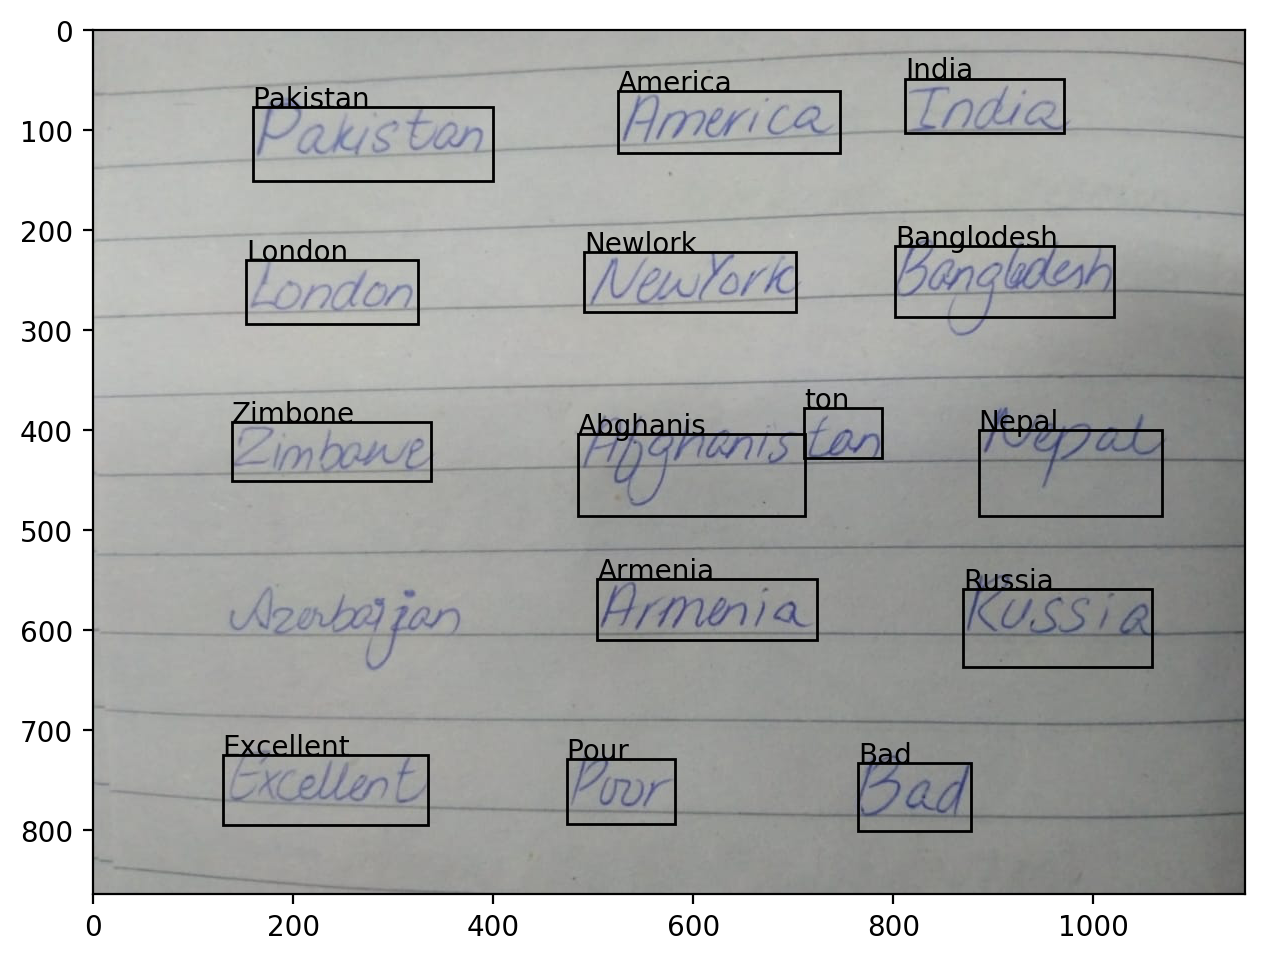

In [8]:

image=Image.open('testing_2.jpeg')
plot_bounding_boxes(image,(image.size),response_output_filtered)

In [9]:
  
def polygon_parsing_the_textract_DetectDocumentText_response(response):
    
    output_dict={}
    data_list=response['Blocks']
    for index,value in enumerate(data_list):
        if value['BlockType']=='WORD':
            text=value['Text']
            confidence=value['Confidence'] 
            polygon_list=value['Geometry']['Polygon']
            output_dict[text]=polygon_list
    return output_dict

In [10]:
# For plotting the polygons

def plot_polygons(image,image_size,response_with_polygon):
    
    
    my_dpi=200
    fig=plt.figure(figsize=(float(image_size[0])/my_dpi,float(image_size[1])/my_dpi),dpi=my_dpi)
    
    for key in response_with_polygon.keys():
        coordinates_list=[]
        for index,value in enumerate(response_with_polygon[key]):
            ind_list=[]
            value_X=value['X']*image_size[0]
            value_Y=value['Y']*image_size[1]
            ind_list.append(value_X)
            ind_list.append(value_Y)
            coordinates_list.append(ind_list)
            
    
    
        coord =coordinates_list

        ax=fig.add_subplot(111)
        ax.add_patch(matplotlib.patches.Polygon(coord,fill=False))
        ax.imshow(image)
    plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


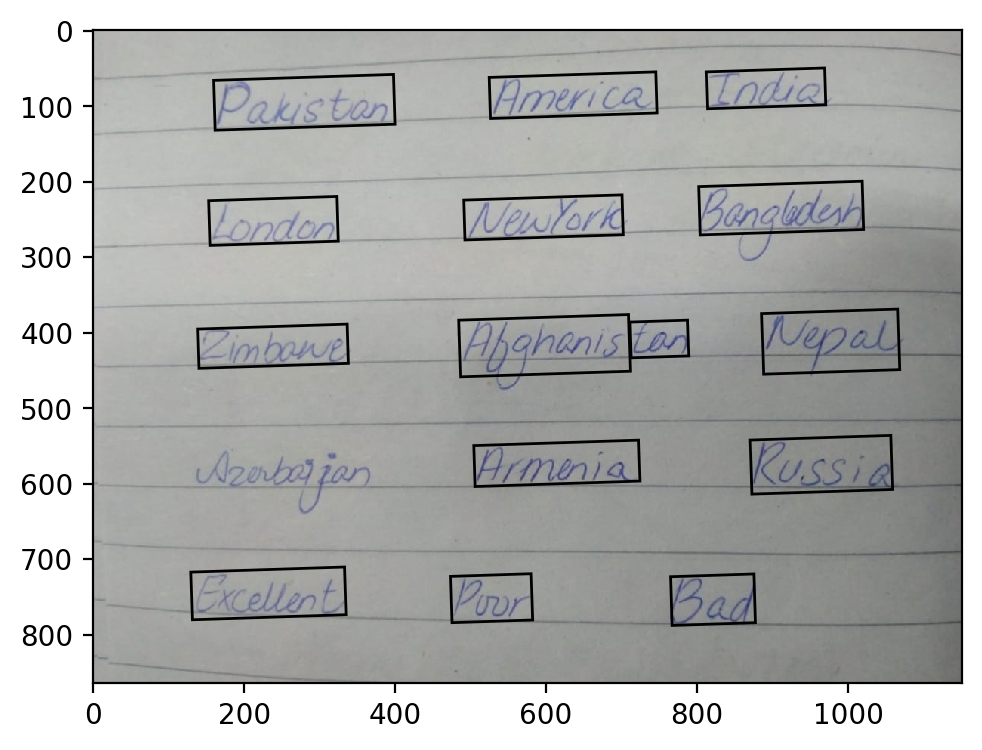

In [11]:
response_with_polygon_values=polygon_parsing_the_textract_DetectDocumentText_response(response)
image=Image.open('testing_2.jpeg')
plot_polygons(image,image.size,response_with_polygon_values)

In [12]:
coord.append(coord[0]) #repeat the first point to create a 'closed loop'

        xs, ys = zip(*coord) #create lists of x and y values


        plt.plot(xs,ys)

IndentationError: unexpected indent (<ipython-input-12-f993614116d8>, line 3)